In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random


## Exercício 2, capítulo 2


In [27]:
#Define função logística e uma função para obter os pontos de uma órbita de tamanha n e condição inicial x0

def logistico(x,r):
    return r*x*(1-x)

def orbita(x0,n,r):
    y=x0
    resultado=np.zeros(n)
    resultado[0]=x0
    for i in range(1,n):
        y=logistico(y,r)
        resultado[i]=y
    return resultado

#Define os valores de r propostos
rs=[[0.5,2.0],[3.2,3.54]]


### a)

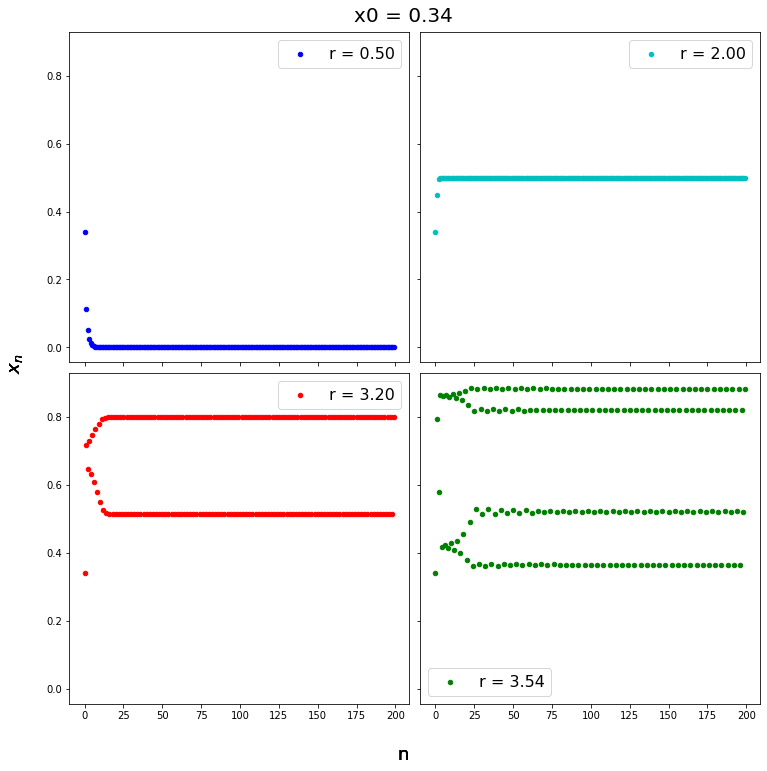

In [28]:

#Define-se quantos pontos utilizar e o ponto inicial x0
n=200
x0=0.34

#Cria uma figura com matriz de eixos e define cores para cada gráfico

fig,ax=plt.subplots(nrows=2,ncols=2,constrained_layout=True,sharex=True, sharey=True,figsize=(10,10))
colors=[['b','c'],['r','g']]

fig.suptitle('x0 = %.2f'%x0,fontsize=20)

#itera sobre os valores de r propostos e faz os gráfico das órbitas, ou seja, da função x(n) onde n é o n-ésimo termo da órbita

for j in range(2):
    for i in range(2):
        r=rs[i][j]
        ax[i][j].scatter(range(n),orbita(x0,n,r),label="r = %.2f"%r,color=colors[i][j],s=20)
        ax[i][j].legend(fontsize=16)
        fig.text(0.5, -0.05, 'n', ha='center',fontsize=18)
        fig.text(-0.05, 0.5, '$x_{n}$', va='center', rotation='vertical',fontsize=18)



### b)

In [29]:
#Define a função escada para um dado x0, n e r

def escada(x0,n,r):
    y=logistico(x0,r)
    points=np.array([x0,0])
    points=np.vstack([points,[x0,y]])
    for i in range(n-1):
        x=y
        points=np.vstack([points,[x,y]])
        y=logistico(y,r)
        points=np.vstack([points,[x,y]])
    return points




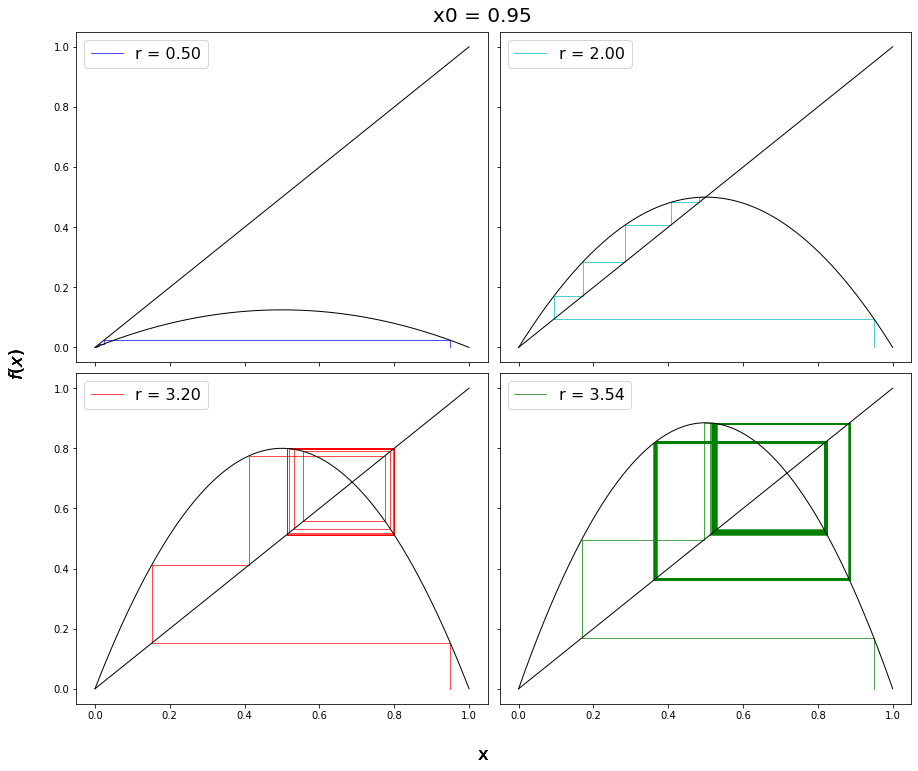

In [30]:
#define condições inicias e quantidade de iterações
n=100
x0=0.95

#vectoriza a função
vector=np.vectorize(logistico)

#Cria figuras
fig,ax=plt.subplots(nrows=2,ncols=2,constrained_layout=True,sharex=True, sharey=True,figsize=(12,10))
colors=[['b','c'],['r','g']]
x=np.linspace(0,1,1000)
fig.suptitle('x0 = %.2f'%x0,fontsize=20)
for j in range(2):
    for i in range(2):
        r=rs[i][j]
        pontos=escada(x0,n,r)
        pontos_x=pontos.transpose()[0]
        pontos_y=pontos.transpose()[1]
        y=vector(x,r)
        ax[i][j].plot(pontos_x,pontos_y,"-",c=colors[i][j],lw=0.7,label="r = %.2f"%r)
        ax[i][j].plot(x,x,c='k',lw=1)
        ax[i][j].plot(x,y,c='k',lw=1)
        ax[i][j].legend(fontsize=16)
        #ax[i][j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        fig.text(0.5, -0.05, 'x', ha='center',fontsize=18)
        fig.text(-0.05, 0.5, '$f(x)$', va='center', rotation='vertical',fontsize=18)


## Exercício 8, capítulo 2

### a)

In [31]:
#Escolhe como dividir os r
r1=np.linspace(0,3,1000)
r2=np.linspace(3,3.5,3000)
r3=np.linspace(3.5,4,10000)
rs=np.concatenate([r1,r2,r3])
n_pontos=2

#Define função que encontra os pontos assíntotos
def assintota(x0,r,iteradas,n_pontos=3):
    return orbita(x0,iteradas,r)[-n_pontos:]

In [32]:

pontos=np.array([])
rf=np.array([])
for j,r in enumerate(rs):
    x0=random.random()
    pontos=np.concatenate([pontos,assintota(x0,r,500,n_pontos=n_pontos)])
    rf=np.concatenate([rf,np.full(n_pontos,r)])




In [33]:
rs

array([0.00000000e+00, 3.00300300e-03, 6.00600601e-03, ...,
       3.99989999e+00, 3.99994999e+00, 4.00000000e+00])

Text(0, 0.5, 'y')

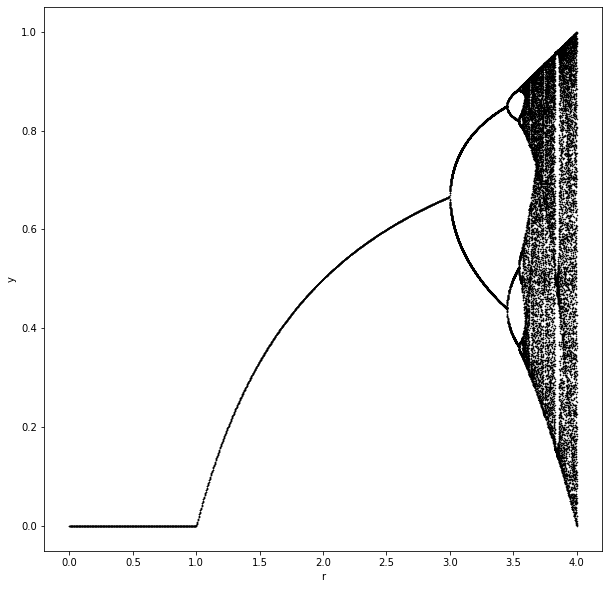

In [34]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(rf,pontos,s=0.3,c='k')
ax.set_xlabel('r')
ax.set_ylabel('y')

### b)

In [35]:
r_inf=3.5699

Text(0, 0.5, 'y')

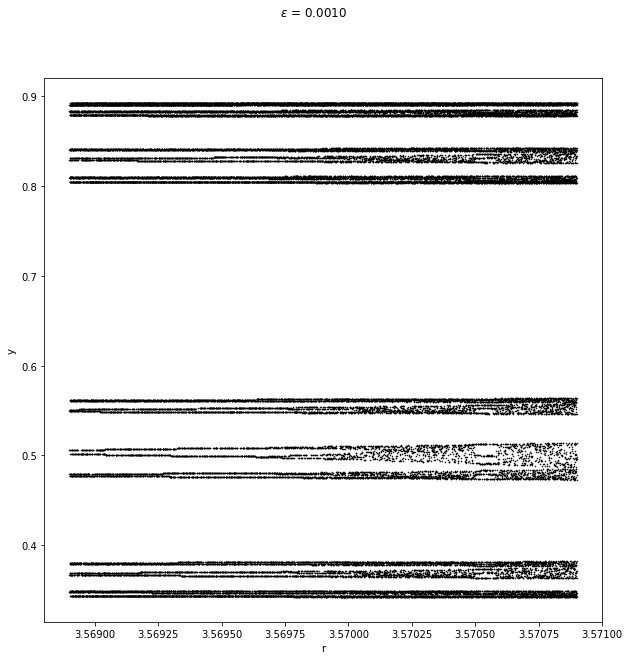

In [36]:
epsilon=0.001
rs=np.linspace(r_inf-epsilon,r_inf+epsilon,10000)
n_pontos=5
pontos=np.array([])
rf=np.array([])
for j,r in enumerate(rs):
    x0=random.random()
    pontos=np.concatenate([pontos,assintota(x0,r,2000,n_pontos=n_pontos)])
    rf=np.concatenate([rf,np.full(n_pontos,r)])


fig,ax=plt.subplots(figsize=(10,10))
fig.suptitle("$\epsilon$ = %.4f"%epsilon)
ax.scatter(rf,pontos,s=0.3,c='k')
ax.set_xlabel('r')
ax.set_ylabel('y')

In [37]:
epsilon=0.01
rs=np.linspace(r_inf-epsilon,r_inf+epsilon,10000)
n_pontos=5
pontos=np.array([])
rf=np.array([])
for j,r in enumerate(rs):
    x0=random.random()
    pontos=np.concatenate([pontos,assintota(x0,r,2000,n_pontos=n_pontos)])
    rf=np.concatenate([rf,np.full(n_pontos,r)])



Text(0, 0.5, 'y')

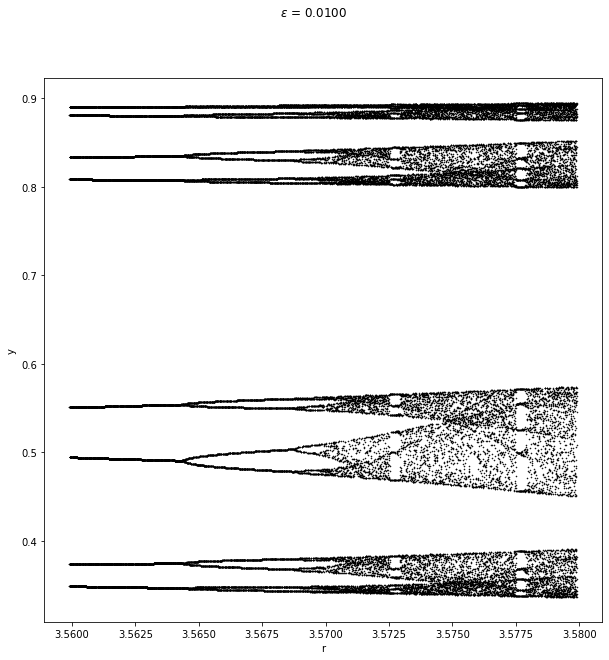

In [38]:
fig,ax=plt.subplots(figsize=(10,10))
fig.suptitle("$\epsilon$ = %.4f"%epsilon)
ax.scatter(rf,pontos,s=0.3,c='k')
ax.set_xlabel('r')
ax.set_ylabel('y')

### b)

#### b.1) período 3

Text(0, 0.5, 'y')

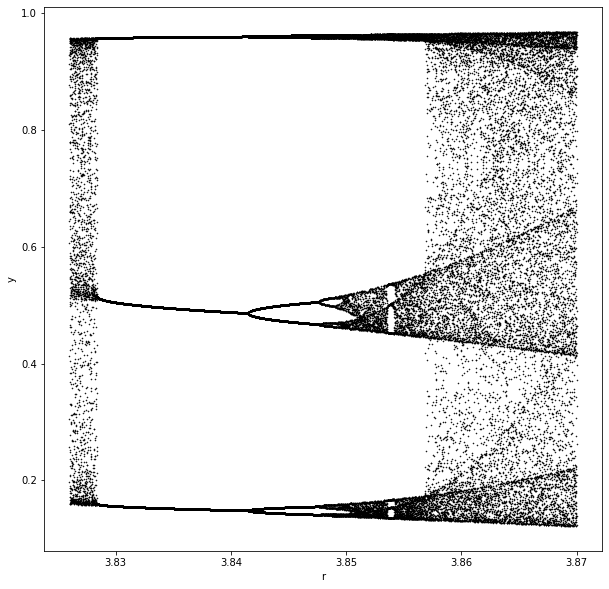

In [39]:

rs=np.linspace(3.826,3.87,10000)
n_pontos=5
pontos=np.array([])
rf=np.array([])
for j,r in enumerate(rs):
    x0=random.random()
    pontos=np.concatenate([pontos,assintota(x0,r,1000,n_pontos=n_pontos)])
    rf=np.concatenate([rf,np.full(n_pontos,r)])


fig,ax=plt.subplots(figsize=(10,10))
#fig.suptitle("$\epsilon$ = %.4f"%epsilon)
ax.scatter(rf,pontos,s=0.3,c='k')
ax.set_xlabel('r')
ax.set_ylabel('y')

#### b.2) Período 5

Text(0, 0.5, 'y')

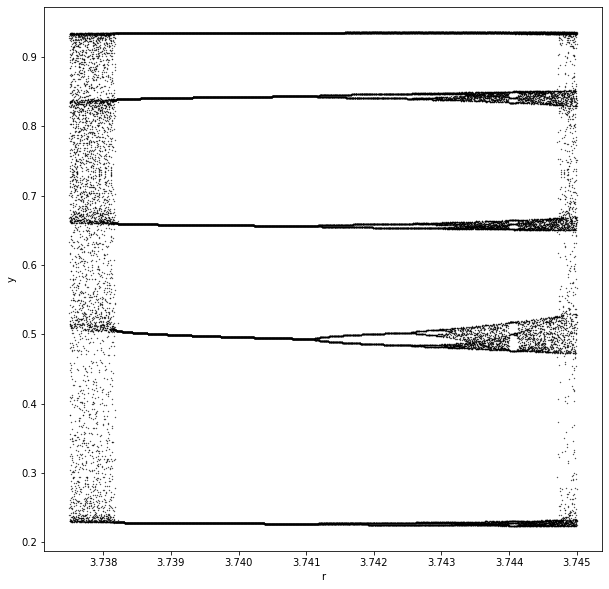

In [40]:

rs=np.linspace(3.7375,3.7450,10000)
n_pontos=5
pontos=np.array([])
rf=np.array([])
for j,r in enumerate(rs):
    x0=random.random()
    pontos=np.concatenate([pontos,assintota(x0,r,1000,n_pontos=n_pontos)])
    rf=np.concatenate([rf,np.full(n_pontos,r)])


fig,ax=plt.subplots(figsize=(10,10))
#fig.suptitle("$\epsilon$ = %.4f"%epsilon)
ax.scatter(rf,pontos,s=0.1,c='k')
ax.set_xlabel('r')
ax.set_ylabel('y')

#### b.3) Período 6

Text(0, 0.5, 'y')

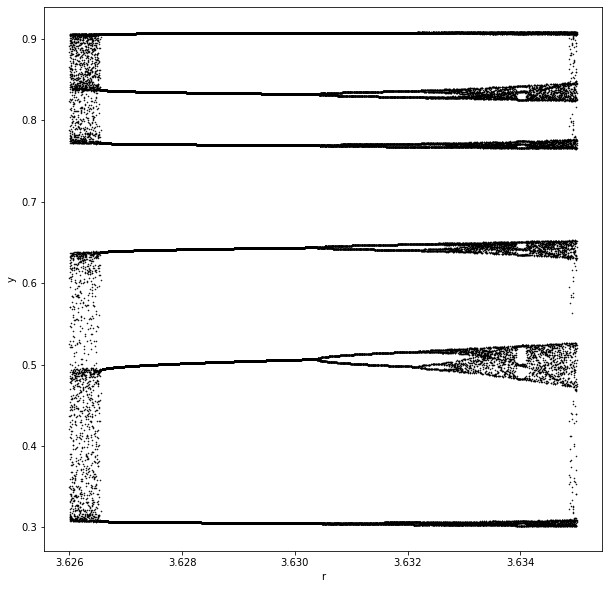

In [41]:

rs=np.linspace(3.626,3.635,10000)
n_pontos=5
pontos=np.array([])
rf=np.array([])
for j,r in enumerate(rs):
    x0=random.random()
    pontos=np.concatenate([pontos,assintota(x0,r,3000,n_pontos=n_pontos)])
    rf=np.concatenate([rf,np.full(n_pontos,r)])


fig,ax=plt.subplots(figsize=(10,10))
#fig.suptitle("$\epsilon$ = %.4f"%epsilon)
ax.scatter(rf,pontos,s=0.3,c='k')
ax.set_xlabel('r')
ax.set_ylabel('y')

### c)

Text(0, 0.5, 'y')

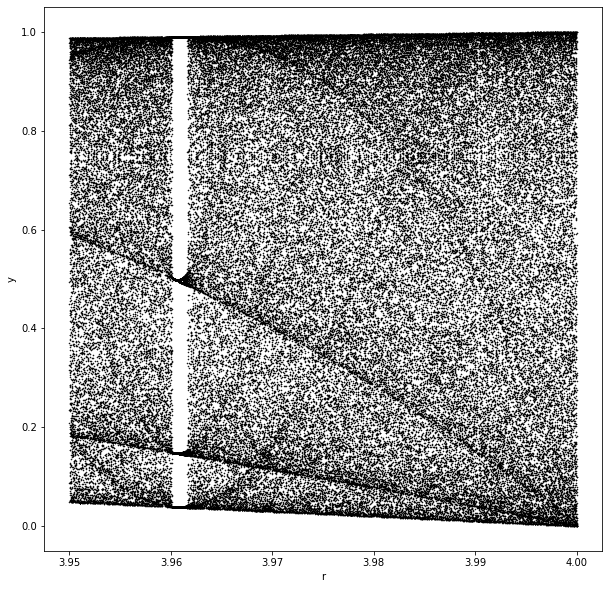

In [42]:

rs=np.linspace(3.95,4,10000)
n_pontos=10
pontos=np.array([])
rf=np.array([])
for j,r in enumerate(rs):
    x0=random.random()
    pontos=np.concatenate([pontos,assintota(x0,r,3000,n_pontos=n_pontos)])
    rf=np.concatenate([rf,np.full(n_pontos,r)])


fig,ax=plt.subplots(figsize=(10,10))
#fig.suptitle("$\epsilon$ = %.4f"%epsilon)
ax.scatter(rf,pontos,s=0.3,c='k')
ax.set_xlabel('r')
ax.set_ylabel('y')

## Exercício 1, Capítulo 3

In [43]:
#Define-se o mapa derivada do logístico
def derivada_logistico(x,r=4):
    return r-2*r*x

derivada_vector=np.vectorize(derivada_logistico)

#Define-se o expoente de Lyapunov truncado em n
def expoente_lyapunov(x0,n,r=4):
    pontos=orbita(x0,n,r)
    derivadas=derivada_vector(pontos,r)
    return 1/n*np.log(np.abs(derivadas)).sum()




In [44]:
#Valores de N utilizados
valores=np.array([1,5,10,100,1000,10000,100000,1000000])
exp=np.zeros(len(valores))
x0=0.13
for j,N in enumerate(valores):
    exp[j]=expoente_lyapunov(x0,N,4)

exp

array([1.08518927, 0.77226088, 0.73206494, 0.68721436, 0.69339347,
       0.69279372, 0.69315115, 0.69314743])

In [45]:

erro=abs(exp-np.log(2))/(np.log(2))
import pandas as pd
df=pd.DataFrame({"N":valores,r"expoente":exp,"erro":erro})
df


,N,expoente,erro
0,1,1.085189,5.655972e-01
1,5,0.772261,1.141369e-01
2,10,0.732065,5.614646e-02
3,100,0.687214,8.559258e-03
4,1000,0.693393,3.553170e-04
5,10000,0.692794,5.099353e-04
6,100000,0.693151,5.720815e-06
7,1000000,0.693147,3.632762e-07


In [46]:

valores=np.array([1,5,10,100,1000,10000,100000,1000000])
exp=np.zeros(len(valores))
x0=0.65
for j,N in enumerate(valores):
    exp[j]=expoente_lyapunov(x0,N,4)


erro=abs(exp-np.log(2))/(np.log(2))
df=pd.DataFrame({"N":valores,r"expoente":exp,"erro":erro})
df

,N,expoente,erro
0,1,0.182322,7.369656e-01
1,5,0.474488,3.154579e-01
2,10,0.679796,1.926232e-02
3,100,0.671706,3.093376e-02
4,1000,0.692972,2.529401e-04
5,10000,0.693150,4.354205e-06
6,100000,0.693147,2.689813e-07
7,1000000,0.693147,8.706370e-07


### Exercício 2,Capítulo 3

In [47]:

rs=np.linspace(0,4,10000)
#Define tamanho da órbita no cálculo de gamma
n=1000
expoente_vector=np.vectorize(expoente_lyapunov)
#Escolhe x0 arbitrário
x0=np.random.rand(len(rs))
#Calcula o expoente para cada r e x0
y=expoente_vector(x0,n,rs)


C:\Users\Bruno\AppData\Local\Temp/ipykernel_18908/2189609174.py:11: RuntimeWarning: divide by zero encountered in log
  return 1/n*np.log(np.abs(derivadas)).sum()


C:\Users\Bruno\AppData\Local\Temp/ipykernel_18908/3846746158.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


Text(28.25, 0.5, '$\\lambda$')

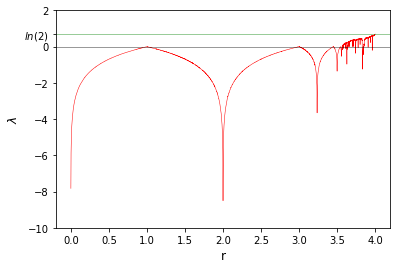

In [48]:
#Figura
fig,ax=plt.subplots()



ax.plot(rs,y,lw=0.5,c='r')
plt.draw()
labels=[q.get_text() for q in ax.get_yticklabels()]
locs=list(ax.get_yticks())
labels+=[r'$ln(2)$']
locs+=[np.log(2)]
ax.set_yticklabels(labels)
ax.set_yticks(locs)
ax.axhline(0,c='k',lw=0.5,alpha=0.8)
ax.axhline(np.log(2),c='g',lw=0.5,alpha=0.8)
ax.set_xlabel("r",fontsize=12)
ax.set_ylabel(r"$\lambda$",fontsize=12)


In [49]:
rs=np.linspace(3,4,10000)
n=1000
expoente_vector=np.vectorize(expoente_lyapunov)
x0=np.random.rand(len(rs))
#x0=np.full(len(rs),0.4)
y=expoente_vector(x0,n,rs)

C:\Users\Bruno\AppData\Local\Temp/ipykernel_18908/2443661729.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


Text(28.25, 0.5, '$\\lambda$')

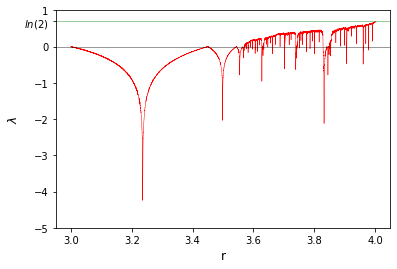

In [50]:
fig,ax=plt.subplots()



ax.plot(rs,y,lw=0.5,c='r')
plt.draw()
labels=[q.get_text() for q in ax.get_yticklabels()]
locs=list(ax.get_yticks())
labels+=[r'$ln(2)$']
locs+=[np.log(2)]
ax.set_yticklabels(labels)
ax.set_yticks(locs)
ax.axhline(0,c='k',lw=0.5,alpha=0.8)
ax.axhline(np.log(2),c='g',lw=0.5,alpha=0.8)
ax.set_xlabel("r",fontsize=12)
ax.set_ylabel(r"$\lambda$",fontsize=12)
#ax.set_yticklabels({np.log(2):"$ln(2)$"})

#trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)